# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset collected is related to 17 marketing campaigns between May 2008 and November 2010.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns
import time

from sklearn import svm
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, classification_report

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

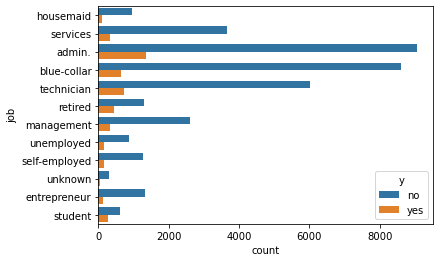

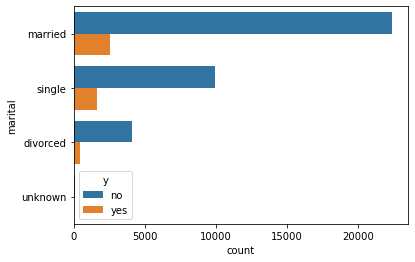

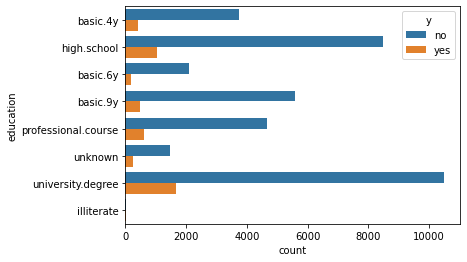

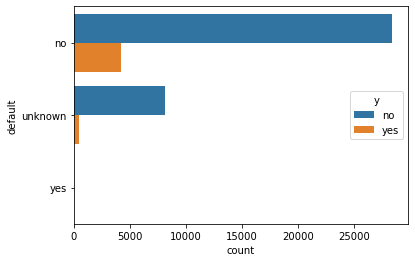

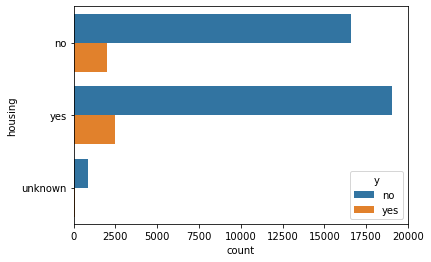

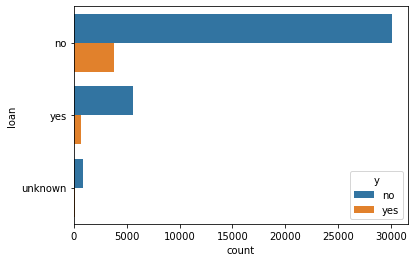

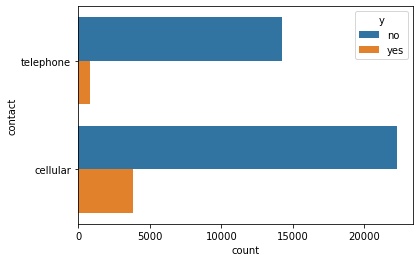

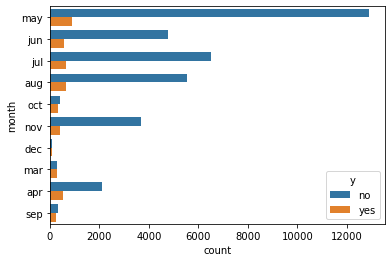

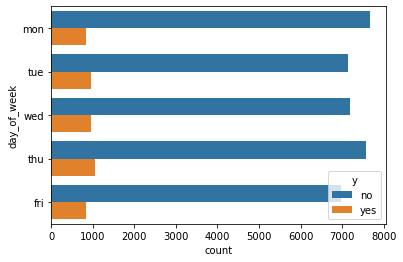

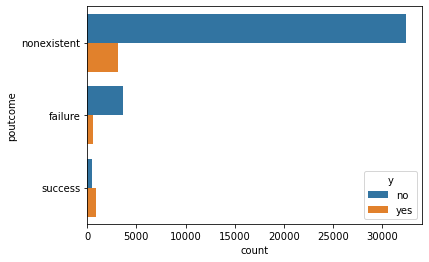

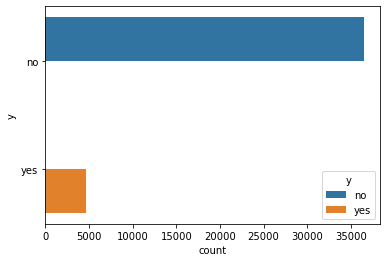

In [54]:
for col in df.select_dtypes(include='object').columns:
    plt.figure()
    sns.countplot(data=df, y=col, hue='y')

# Data Visualization
## Univariate Analysis
### Categorical Feature Analysis

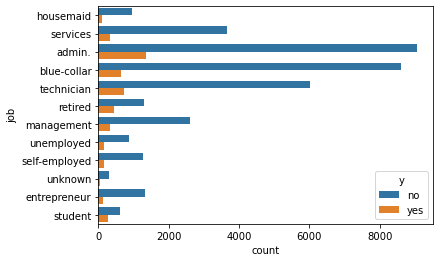

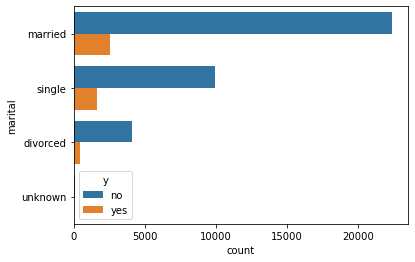

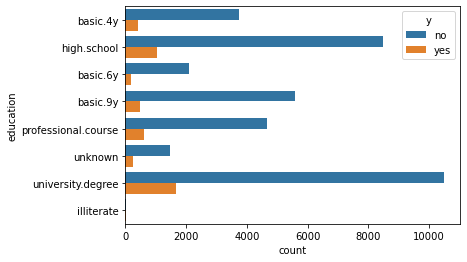

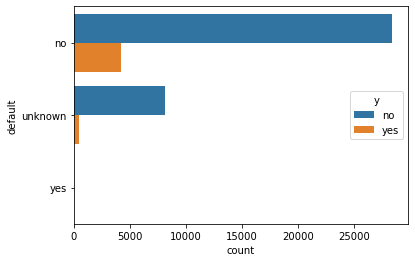

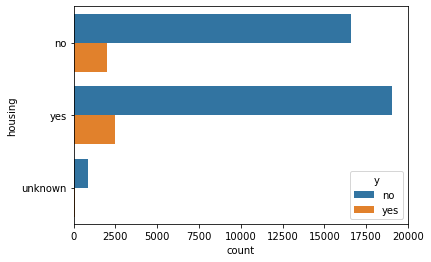

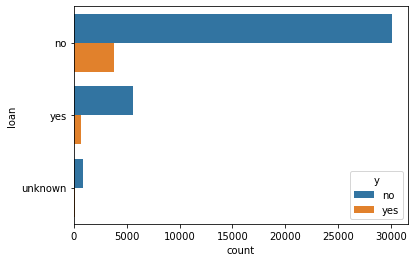

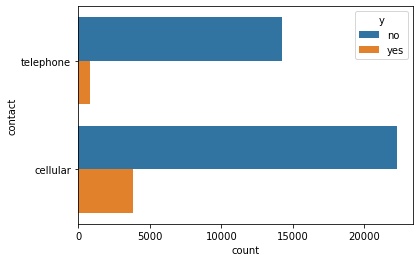

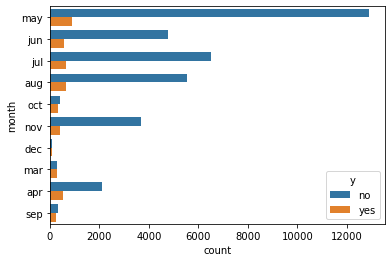

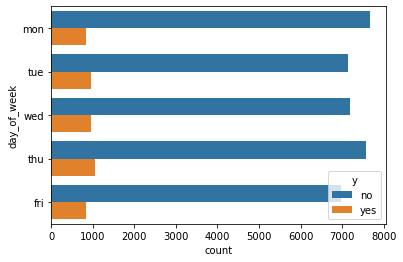

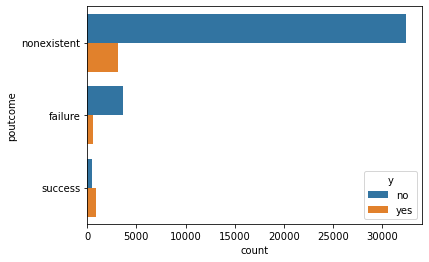

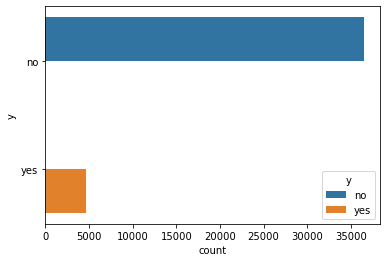

In [54]:
for col in df.select_dtypes(include='object').columns:
    plt.figure()
    sns.countplot(data=df, y=col, hue='y')

### Numerical Feature Analysis

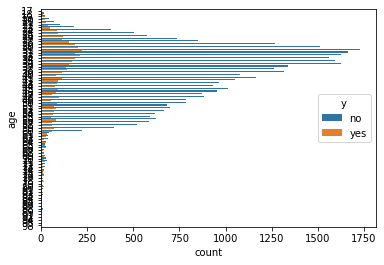

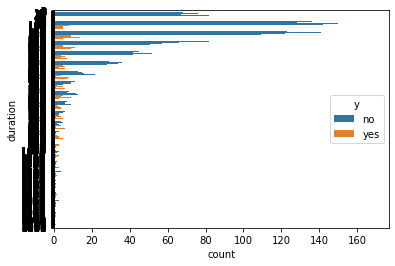

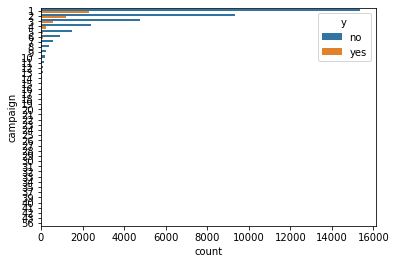

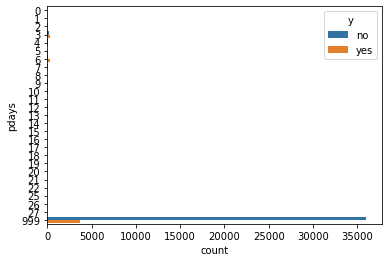

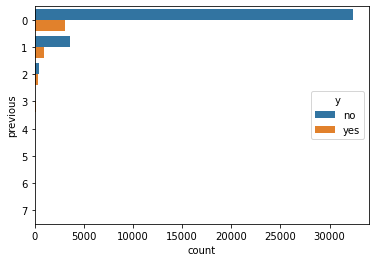

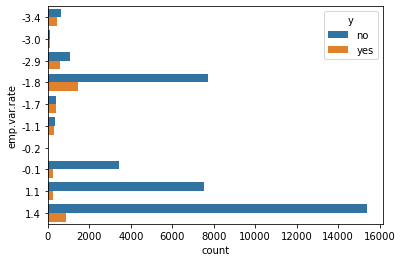

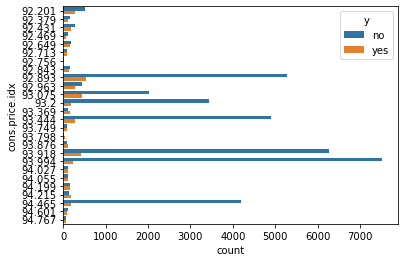

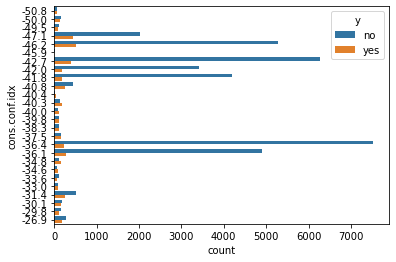

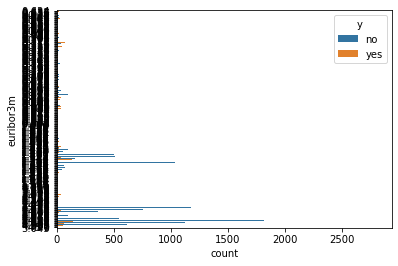

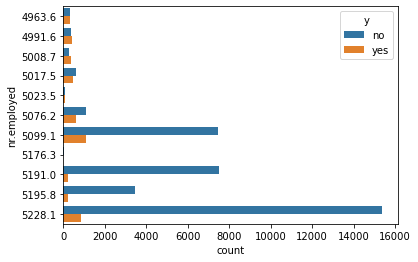

In [55]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure()
    sns.countplot(data=df, y=col, hue='y')

The business objective of this task is to find a model that can explain success of a contact. Marketing campaigns have very low response rates; therefore, this Data Mining project will aim to identify the best model in terms of positive predictive power.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [8]:
X = df.iloc[:, 0:7]
y = df['y'].map({'no': 0, 'yes': 1})
X, y

(       age          job  marital            education  default housing loan
 0       56    housemaid  married             basic.4y       no      no   no
 1       57     services  married          high.school  unknown      no   no
 2       37     services  married          high.school       no     yes   no
 3       40       admin.  married             basic.6y       no      no   no
 4       56     services  married          high.school       no      no  yes
 ...    ...          ...      ...                  ...      ...     ...  ...
 41183   73      retired  married  professional.course       no     yes   no
 41184   46  blue-collar  married  professional.course       no      no   no
 41185   56      retired  married    university.degree       no     yes   no
 41186   44   technician  married  professional.course       no      no   no
 41187   74      retired  married  professional.course       no     yes   no
 
 [41188 rows x 7 columns],
 0        0
 1        0
 2        0
 3        0

In [15]:
selector = make_column_selector(dtype_include=object)
transformer = make_column_transformer((OneHotEncoder(drop = 'first'), selector),
                                     remainder = StandardScaler())
lgr_pipe = Pipeline([('transformer', transformer),
                    ('lgr', LogisticRegression(random_state=42, max_iter = 1000))])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [52]:
df[df.duplicated()].sum()

age                                                             491
job               blue-collarretiredtechniciantechniciantechnici...
marital           marriedmarriedsingledivorcedsinglemarriedmarri...
education         basic.6yunknownprofessional.coursehigh.schoolp...
default                               nononononounknownnononononono
housing                               nononoyesyesnoyesnoyesyesnono
loan                                       nononononononononononono
contact           telephonetelephonecellularcellularcellularcell...
month                          mayjuljuljuljulaugaugnovaprmayjuloct
day_of_week                    thuthumonthuthumontuetuetuefrithutue
duration                                                       1831
campaign                                                         19
pdays                                                         11988
previous                                                          0
poutcome          nonexistentnonexistentnonexist

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [39]:
t0 = time.time()
lgr_pipe.fit(X_train, y_train)
print(time.time() - t0)

0.26291728019714355


### Problem 9: Score the Model

What is the accuracy of your model?

### Logistic Regression Model

In [20]:
log_predict_train = lgr_pipe.predict(X_train)
log_predict_test = lgr_pipe.predict(X_test)
log_report = classification_report(y_test, log_predict_test)
print(log_report)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      9137
           1       0.00      0.00      0.00      1160

    accuracy                           0.89     10297
   macro avg       0.44      0.50      0.47     10297
weighted avg       0.79      0.89      0.83     10297



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


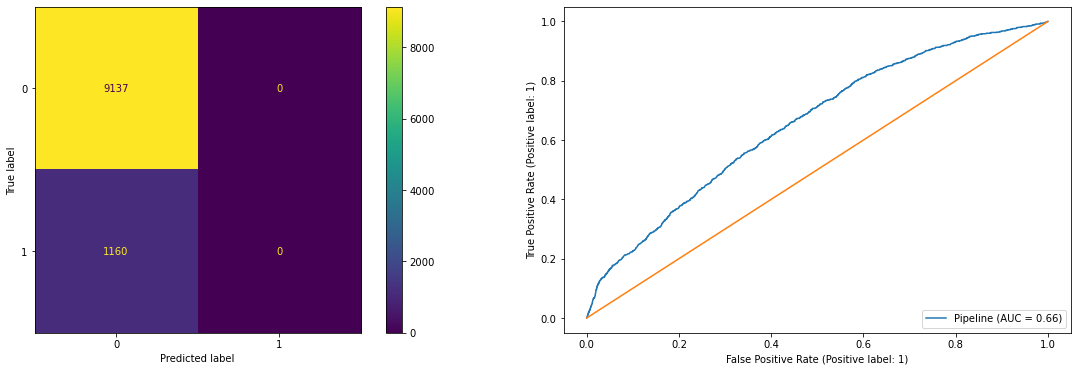

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(lgr_pipe, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(lgr_pipe, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]))

The baseline logistic regression model has perfect recall. However, it has no predictive power concerning which customers actually subscribed the deposit and there is signifcant type II error.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [70]:
knn_pipe = Pipeline([('transformer', transformer),
                    ('knn', KNeighborsClassifier())])
tree_pipe = Pipeline([('transformer', transformer),
                    ('tree', DecisionTreeClassifier())])
svm_pipe = Pipeline([('transformer', transformer),
                    ('svm', svm.SVC())])

### KNN Model

In [40]:
t1 = time.time()
knn_pipe.fit(X_train, y_train)
print(time.time() - t1)

0.07251906394958496


In [25]:
knn_predict_train = knn_pipe.predict(X_train)
knn_predict_test = knn_pipe.predict(X_test)
knn_report = classification_report(y_test, knn_predict_test)
print(knn_report)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      9137
           1       0.33      0.08      0.13      1160

    accuracy                           0.88     10297
   macro avg       0.61      0.53      0.53     10297
weighted avg       0.83      0.88      0.84     10297



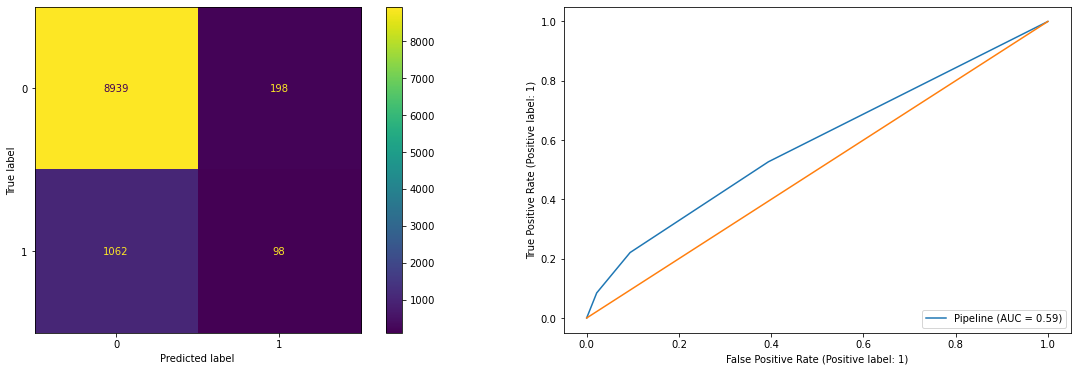

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(knn_pipe, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(knn_pipe, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]))

The baseline knn model does have better positive predictive power. However, it comes at the cost of some type I error and significant type II error.

### Decision Tree Model

In [42]:
t2 = time()
tree_pipe.fit(X_train, y_train)
print(time() - t2)

0.5275111198425293


In [28]:
tree_predict_train = tree_pipe.predict(X_train)
tree_predict_test = tree_pipe.predict(X_test)
tree_report = classification_report(y_test, tree_predict_test)
print(tree_report)

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      9137
           1       0.23      0.09      0.13      1160

    accuracy                           0.86     10297
   macro avg       0.56      0.53      0.53     10297
weighted avg       0.82      0.86      0.84     10297



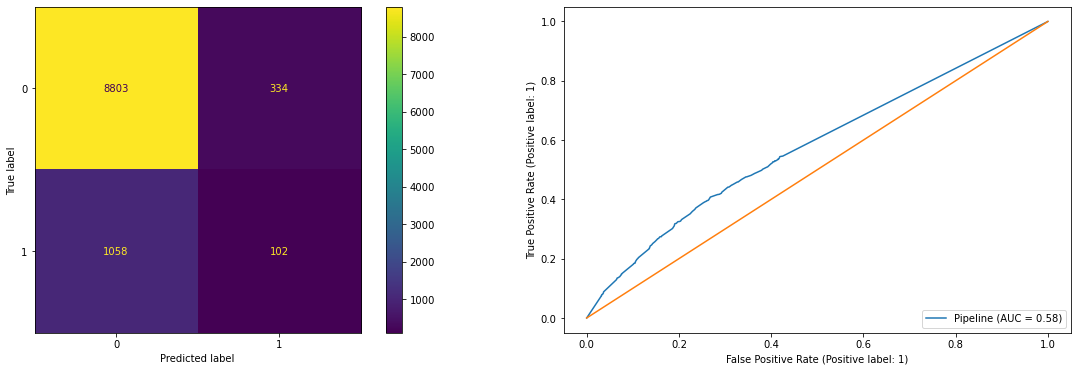

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(tree_pipe, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(tree_pipe, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]))

The decision tree model yields similar results as the knn model. However, there is 50% more type I error at a neglible increase to positively predicting clients who subscribed a deposit.

### SVM Model

In [71]:
t3 = time.time()
svm_pipe.fit(X_train, y_train)
print(time.time() - t3)

16.613717079162598


In [72]:
svm_predict_train = svm_pipe.predict(X_train)
svm_predict_test = svm_pipe.predict(X_test)
svm_report = classification_report(y_test, svm_predict_test)
print(svm_report)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      9137
           1       0.70      0.40      0.51      1160

    accuracy                           0.91     10297
   macro avg       0.82      0.69      0.73     10297
weighted avg       0.90      0.91      0.90     10297



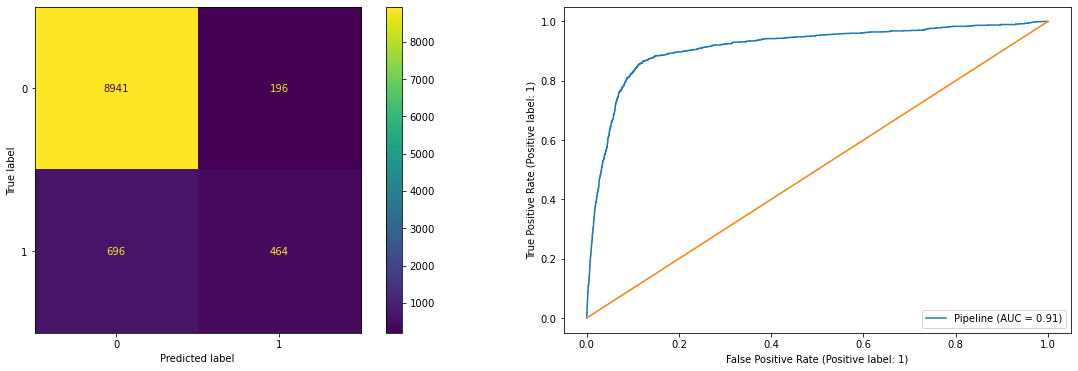

In [73]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(svm_pipe, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(svm_pipe, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]))

The SVM model yields much more positive predictive value with less type I and type II error compared to previos models.

In [46]:
res_dict = {'model': ['Decision Tree','KNN', 'Logistic Regression', 'SVM'],
           'train score': [tree_pipe.score(X_train, y_train), knn_pipe.score(X_train, y_train), lgr_pipe.score(X_train, y_train), svm_pipe.score(X_train, y_train)],
           'test score': [tree_pipe.score(X_test, y_test), knn_pipe.score(X_test, y_test), lgr_pipe.score(X_test, y_test), svm_pipe.score(X_test, y_test)],
           'train time': [0.527, 0.072, 0.262, 0.245]}
results_df = pd.DataFrame(res_dict).set_index('model')
results_df

,train score,test score,train time
model,,,
Decision Tree,0.917775,0.865495,0.527
KNN,0.890680,0.877634,0.072
Logistic Regression,0.887346,0.887346,0.262
SVM,0.887346,0.887346,0.245


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Improvement Strategies

- I will begin from the beginning with the full data set and use an extraction technique to select features based on importance weights.
- I will also perform gridsearches to optimize the hyperparameters of each model.
- Instead of accuracy, I will score my grid searches using the area under the curve approach due to the class imbalance demonstrated in many of these features.

### Create DataFrames

In [48]:
X = df.drop(['y'], axis = 1, inplace = False)
y = df['y'].map({'no': 0, 'yes': 1})
X, y

(       age          job  marital            education  default housing loan  \
 0       56    housemaid  married             basic.4y       no      no   no   
 1       57     services  married          high.school  unknown      no   no   
 2       37     services  married          high.school       no     yes   no   
 3       40       admin.  married             basic.6y       no      no   no   
 4       56     services  married          high.school       no      no  yes   
 ...    ...          ...      ...                  ...      ...     ...  ...   
 41183   73      retired  married  professional.course       no     yes   no   
 41184   46  blue-collar  married  professional.course       no      no   no   
 41185   56      retired  married    university.degree       no     yes   no   
 41186   44   technician  married  professional.course       no      no   no   
 41187   74      retired  married  professional.course       no     yes   no   
 
          contact month day_of_week  d

### Create Training & Testing Samples

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

### Create Data Pipelines & GridSearch Parameters

In [86]:
selector = make_column_selector(dtype_include=object)
transformer = make_column_transformer((OneHotEncoder(drop = 'first'), selector),
                                     remainder = StandardScaler())
extractor = SelectFromModel(LogisticRegression(solver = 'liblinear',random_state = 42))

lgr_pipe = Pipeline([('transformer', transformer),
                    ('selector', extractor),
                    ('lgr', LogisticRegression())])
tree_pipe = Pipeline([('transformer', transformer),
                    ('selector', extractor),
                    ('tree', DecisionTreeClassifier())])
knn_pipe = Pipeline([('transformer', transformer),
                    ('selector', extractor),
                    ('knn', KNeighborsClassifier())])
svm_pipe = Pipeline([('transformer', transformer),
                    ('selector', extractor),
                    ('svm', svm.SVC())])
lgr_params = {'lgr__penalty': ['l1', 'l2'],
              'lgr__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
              'lgr__class_weight': ['none', 'balanced'],
              'lgr__solver': ['liblinear']}
tree_params = {"tree__criterion":['gini', 'entropy'],
               "tree__max_depth":range(1,10),
               "tree__min_samples_split":range(1,10),
               "tree__min_samples_leaf":range(1,5)}
knn_params = {'knn__n_neighbors': (1,10, 1),
              'knn__leaf_size': (20,40,1),
              'knn__p': (1,2),
              'knn__weights': ('uniform', 'distance'),
              'knn__metric': ('minkowski', 'chebyshev')}
svm_params = {'svm__C':[0.1,1,1000],
              'svm__kernel':['rbf','sigmoid','linear'],
              'svm__degree':[2,4,6],
              'svm__gamma': [1, 0.01, 0.0001]}

lgr_grid = GridSearchCV(lgr_pipe, param_grid=lgr_params, verbose = 1, cv = 3, n_jobs=-1, scoring = 'roc_auc')
tree_grid = GridSearchCV(tree_pipe, param_grid=tree_params, verbose = 1, cv = 3, n_jobs=-1, scoring = 'roc_auc')
knn_grid = GridSearchCV(knn_pipe, param_grid=knn_params, verbose = 1, cv = 3, n_jobs=-1, scoring = 'roc_auc')
svm_grid = GridSearchCV(svm_pipe, param_grid=svm_params, verbose = 1, cv = 3, n_jobs=-1, scoring = 'roc_auc')

### Grid Search Fit Times

In [231]:
t4 = time.time()
results1 = lgr_grid.fit(X_train, y_train)
log_fit_time = time.time() - t4
print(log_fit_time)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
54 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1158, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_

14.284880876541138


In [102]:
t5 = time.time()
tree_grid.fit(X_train, y_train)
tree_fit_time = time.time() - t5
print(tree_fit_time)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
216 fits failed out of a total of 1944.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
216 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 969, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-p

165.7134919166565


In [98]:
t6 = time.time()
knn_grid.fit(X_train, y_train)
knn_fit_time = time.time() - t6
print(knn_fit_time)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
33.54259777069092


In [99]:
t7 = time.time()
svm_grid.fit(X_train, y_train)
svm_fit_time = time.time() - t7
print(svm_fit_time)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
2851.7501361370087


# Data Visualization
## Univariate Analysis
### Categorical Feature Analysis

### Model Grid Search Classification Reports

In [103]:
lgr_predict_train = lgr_grid.predict(X_train)
lgr_predict_test = lgr_grid.predict(X_test)
lgr_report = classification_report(y_test, lgr_predict_test)

tree_predict_train = tree_grid.predict(X_train)
tree_predict_test = tree_grid.predict(X_test)
tree_report = classification_report(y_test, tree_predict_test)

knn_predict_train = knn_grid.predict(X_train)
knn_predict_test = knn_grid.predict(X_test)
knn_report = classification_report(y_test, knn_predict_test)

svm_predict_train = svm_grid.predict(X_train)
svm_predict_test = svm_grid.predict(X_test)
svm_report = classification_report(y_test, svm_predict_test)

print(lgr_report, tree_report, knn_report, svm_report)

              precision    recall  f1-score   support

           0       0.99      0.85      0.92      9137
           1       0.44      0.90      0.59      1160

    accuracy                           0.86     10297
   macro avg       0.71      0.88      0.75     10297
weighted avg       0.92      0.86      0.88     10297
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      9137
           1       0.66      0.51      0.57      1160

    accuracy                           0.91     10297
   macro avg       0.80      0.74      0.76     10297
weighted avg       0.91      0.91      0.91     10297
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      9137
           1       0.63      0.45      0.52      1160

    accuracy                           0.91     10297
   macro avg       0.78      0.71      0.74     10297
weighted avg       0.90      0.91      0.90     10297
               preci

### Model Grid Search Confusion Matrices & AUC Reports

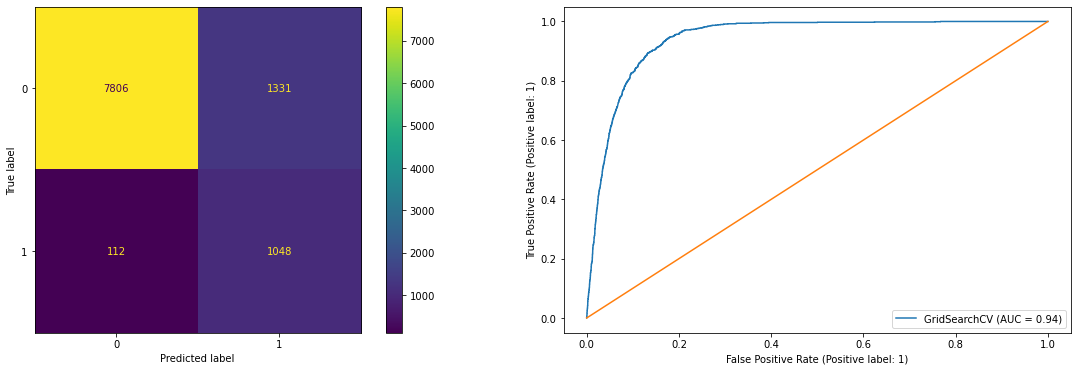

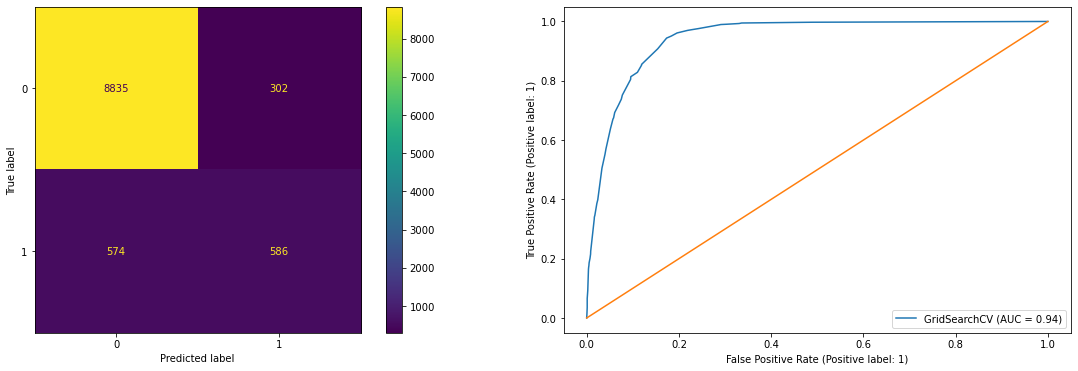

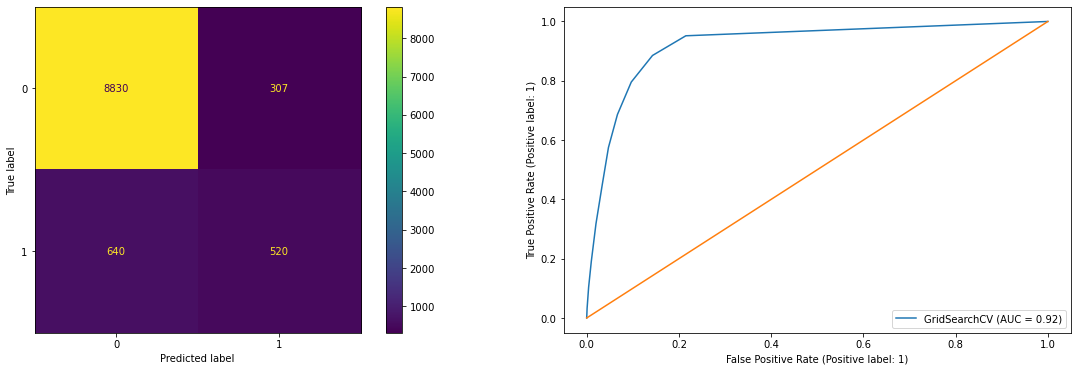

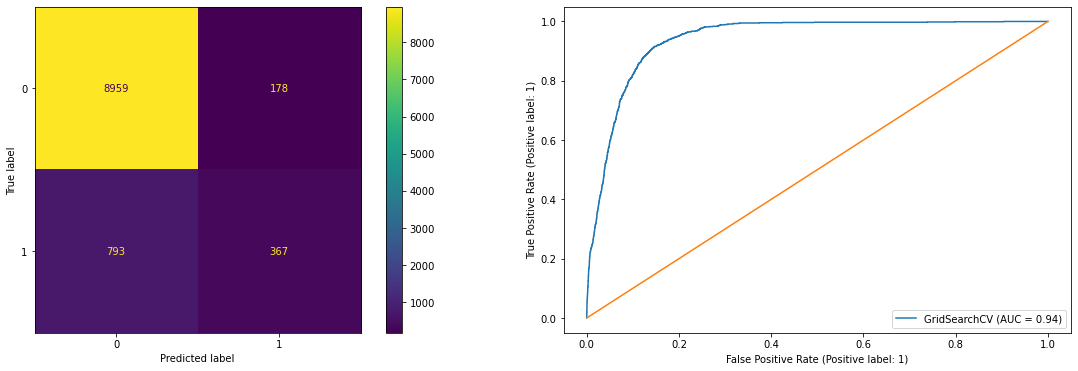

In [104]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(lgr_grid, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(lgr_grid, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]))

fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(tree_grid, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(tree_grid, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]))

fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(knn_grid, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(knn_grid, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]))

fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(svm_grid, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(svm_grid, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]))

- The logistic regression model has both the highest AUC score of 0.94 and the highest positive predictive power.
- The decision tree and svm models also share the highest AUC score of 0.94 have less type I error, more type II error, and much less positive predictive power.
- The knn model has a smaller AUC score of 0.92 and appears to be slightly outperformed by the decision tree model.
- Depending on the amount of resources availabe the logistic regression model would be the most successful, yet costly model due to the highest type I error of the group
- The decision tree model is more conservative and less costly.

### Logistic Regression Model Grid Search Best Parameters

In [105]:
print('Best Penalty:', lgr_grid.best_estimator_.get_params()['lgr__penalty'])
print('Best C:', lgr_grid.best_estimator_.get_params()['lgr__C'])
print('Best Class Weighting:', lgr_grid.best_estimator_.get_params()['lgr__class_weight'])
print('Best Solver:', lgr_grid.best_estimator_.get_params()['lgr__solver'])

Best Penalty: l1
Best C: 1
Best Class Weighting: balanced
Best Solver: liblinear


### Feature Coefficients

In [203]:
print('Best Tree Criterion:', tree_grid.best_estimator_.get_params()['tree__criterion'])
print('Best Max Depth:', tree_grid.best_estimator_.get_params()['tree__max_depth'])
print('Best Min Samples Split:', tree_grid.best_estimator_.get_params()['tree__min_samples_split'])
print('Best Min Samples Leaf:', tree_grid.best_estimator_.get_params()['tree__min_samples_leaf'])

Best Tree Criterion: entropy
Best Max Depth: 6
Best Min Samples Split: 2
Best Min Samples Leaf: 4


In [107]:
print('Best N Neighbors:', knn_grid.best_estimator_.get_params()['knn__n_neighbors'])
print('Best Leaf size:', knn_grid.best_estimator_.get_params()['knn__leaf_size'])
print('Best P:', knn_grid.best_estimator_.get_params()['knn__p'])
print('Best Weights:', knn_grid.best_estimator_.get_params()['knn__weights'])
print('Metric:', knn_grid.best_estimator_.get_params()['knn__metric'])

Best N Neighbors: 10
Best Leaf size: 1
Best P: 2
Best Weights: uniform
Metric: minkowski


In [108]:
print('Best C:', svm_grid.best_estimator_.get_params()['svm__C'])
print('Best Kernel:', svm_grid.best_estimator_.get_params()['svm__kernel'])
print('Best Degree:', svm_grid.best_estimator_.get_params()['svm__degree'])
print('Best Gamma:', svm_grid.best_estimator_.get_params()['svm__gamma'])

Best C: 1000
Best Kernel: rbf
Best Degree: 2
Best Gamma: 0.0001


### Feature Coefficients

##### Questions

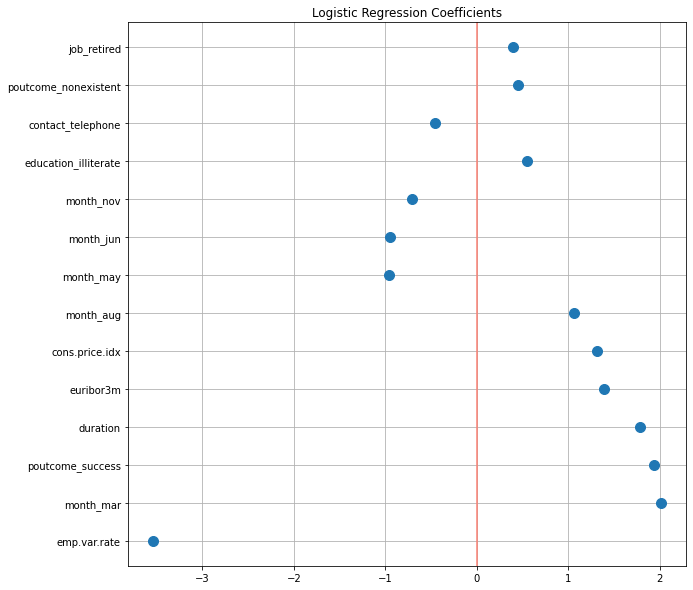

In [181]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(lgr_coef_df['coefs'], lgr_coef_df.index, 'o', markersize = 10)
ax.axvline(color = 'salmon')
ax.set_title('Logistic Regression Coefficients')
plt.grid()

 - Above are the model coefficient values.
 - The model has selected the above features as having the most relevancy regarding a successful contact.
 - After reviewing the documentation regarding the features, I can recommend that previous outcome success, duration of call, retirement, and illiteracy are all positively associated with a successful contact.